### Задание 4

Проведите всесторонний анализ и визуализацию данных. 

Пользуйтесь
https://cloud.mail.ru/public/A8ie/9dJHy8iHo, материалами лекции и другими доступными
источниками.

In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt


##### 1) Используя ресурс kaggle (https://www.kaggle.com/), выберите один из наборов данных. 
Загрузите этот набор и выведите первые 10 записей на экран.


In [2]:
df = pd.read_csv("data/CAR DETAILS FROM CAR DEKHO.csv", sep=",",)
df.head(10)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


##### 2. Опишите данные набора: какие признаки в нем присутствуют, что они означают, какой у них тип данных, какие значения могут принимать.

- name: Название автомобиля.
- year: Год выпуска. 
- selling_price: Цена продажи.
- km_driven: Пробег. 
- fuel: Тип топлива. 
- seller_type: Продавец. 
- transmission: Тип трансмиссии. 
- owner: Какой по счету владелец. 

In [3]:
df.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 1.5 MB


##### 3. Укажите какие признаки являются количественными, качественными порядковыми и качественными номинальными.

Количественные: selling_price, km_driven, year

Качественные порядковые: owner

Качественные номинальные: name, fuel, seller_type, transmission


##### 4. Рассчитайте параметры описательной статистики для признаков набора. 
С помощью
параметров описательной статистики опишите один из количественных признаков и
один из категориальных признаков. Есть ли в количественном признаке выбросы?
Какое значение является выбросом и почему? По какому категориальному признаку
можно группировать данные? Какие группировки представляют интерес и почему?

In [4]:
df_p = df["selling_price"]
print("Параметры для цены:")
mean = np.mean(df_p)
print(f"Среднее: {mean}")

hmean = statistics.harmonic_mean(df_p)
print(f"Гармоническое среднее: {hmean}")

gmean = statistics.geometric_mean(df_p)
print(f"Среднее геометрическое: {gmean}")

median = statistics.median(df_p)
print(f"Медиана: {median}")

mode = statistics.mode(df_p)
print(f"Мода: {mode}")

var = statistics.variance(df_p)
print(f"Дисперсия: {var}")

std = statistics.stdev(df_p)
print(f"Среднеквадратичное отклонение: {std}")

skew = df_p.skew()
print(f"Смещение: {skew}")

ptp = np.ptp(df_p)
print(f"Диапазон: {ptp}")

result = df_p.describe()
print(f"Сводка: \n{result}")


Параметры для цены:
Среднее: 504127.3117511521
Гармоническое среднее: 246804.16547415763
Среднее геометрическое: 349473.95403496304
Медиана: 350000.0
Мода: 300000
Дисперсия: 334718640087.903
Среднеквадратичное отклонение: 578548.7361388865
Смещение: 4.892021472306356
Диапазон: 8880000
Сводка: 
count    4.340000e+03
mean     5.041273e+05
std      5.785487e+05
min      2.000000e+04
25%      2.087498e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64


##### 5. Постройте графики для количественных и категориальных признаков.
Какие визуализации построены для количественных признаков? Какие особенности
распределения данных они позволяют наблюдать? Какие визуализации построены
для категориальных признаков? Какие особенности распределения данных они
позволяют наблюдать? Какие визуализации построены для пар признаков? Какие
особенности распределения данных они позволяют наблюдать?

График плотности для цены:

C:\Users\ISeven\AppData\Local\Temp\ipykernel_3844\1130687207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["selling_price"])


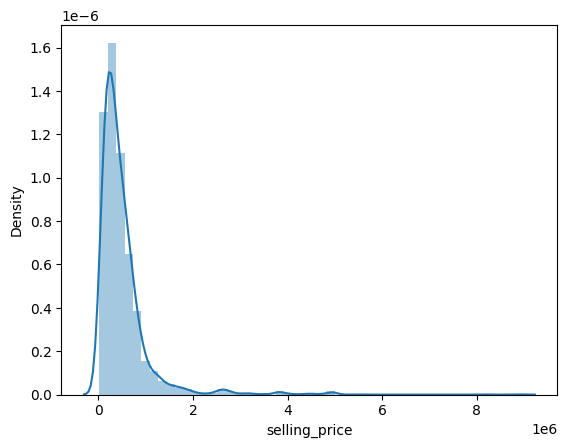

In [5]:
sns.distplot(df["selling_price"])
plt.show()


Зависимость цены от типа трансмиссии и используемого топлива:

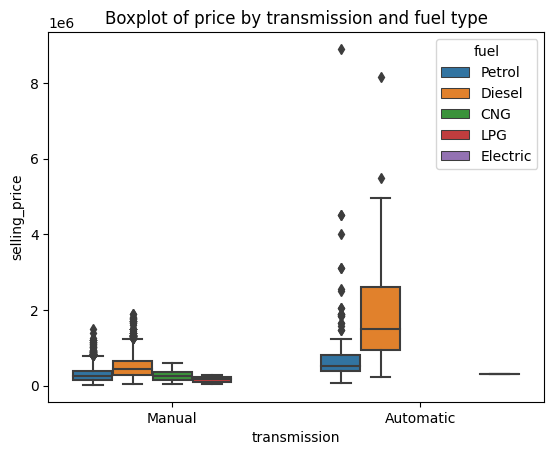

In [6]:
plt.title("Boxplot of price by transmission and fuel type")
sns.boxplot(y="selling_price", x="transmission", hue="fuel", data=df)
plt.show()


##### 6. Проведите корреляционный анализ. Есть ли в вашем наборе данных коррелирующие признаки?

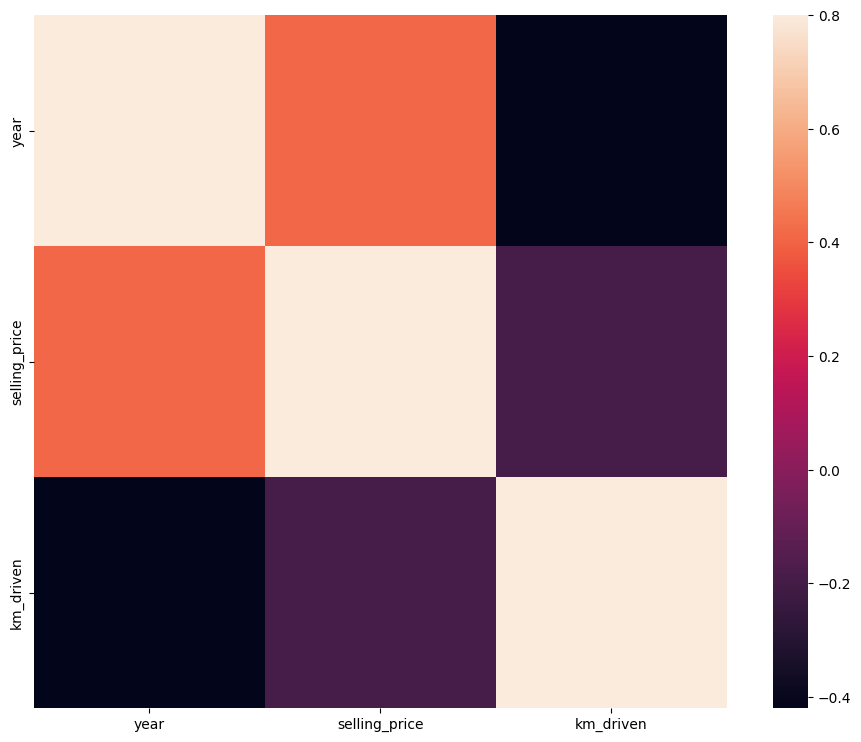

In [7]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True, ax=ax)
plt.show()


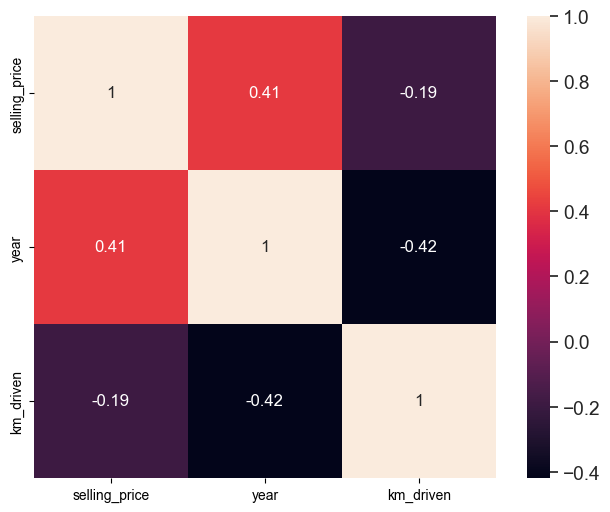

In [8]:
k = 10
output = "selling_price"
top10_attr = corrmat.nlargest(k, output).index
top10_mat = corrmat.loc[top10_attr, top10_attr]
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=1.25)
sns.heatmap(top10_mat, annot=True, annot_kws={'size': 12},
            square=True)
plt.show()


Корреляция между: 
- ценой, годом выпуска
- годом выпуска и пробегом 